In [2]:
import numpy as np
import math
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

In [5]:
def det2x2(m)->float:
    '''Returns the determinant of a 2x2'''
    return m[0][0]*m[1][1]-m[0][1]*m[1][0]


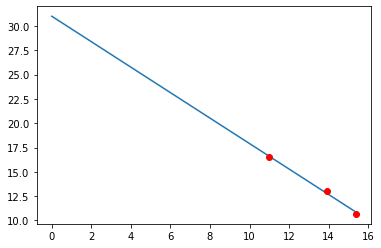

m: -1.3090494483505812 b: 30.99616614943963
asteroid mag: 18.546099170592967


In [6]:
# for photometry
def leastSqFit(vals):
    N=len(list(vals))
    x=vals[:,0]
    y=vals[:,1]
    sumProdXY=sum([x[i]*y[i] for i in range(N)])
    sumX=sum([x[i] for i in range(N)])
    sumY=sum([y[i] for i in range(N)])
    sumXSq=sum([x[i]*x[i] for i in range(N)])
    sumYSq=sum([y[i]*y[i] for i in range(N)])
    #print(N,sumProdXY,sumX,sumY,sumXSq,sumYSq)
    
    Dm=det2x2([[sumProdXY, sumX],[sumY, N]])
    D=det2x2([[sumXSq, sumX],[sumX, N]])
    m=Dm/D
    
    Db=det2x2([[sumXSq, sumProdXY],[sumX, sumY]])
    D=det2x2([[sumXSq, sumX],[sumX, N]])
    b=Db/D
    #print(m,b)
    
    X=np.arange(0,np.max(x),0.1)
    Y=m*X+b
    plt.plot(X,Y)
    plt.plot(x,y,'ro')    
    plt.show()
    
    return m,b
    
    
'''
Source-Sky
13504.37587
16211.9287
12897.46602

---1---
Vmag (APASS, DS9) Source-Sky
10.675 4834410.339064
13.055 1093385.083591
16.552 57937.781586
'''

# notes:
# - make sure to use brighter stars (magnitude <13 or <12)
# - use three different photos and calculate magnitude of asteroid 

# first photo
starSourceSky1 = [4834410.339064, 1093385.083591, 57937.781586]
starVMag1 = [10.675, 13.055, 16.552]
astSourceSky1 = 13504.37587

vals=np.array([[math.log(starSourceSky1[i]), starVMag1[i]] for i in range(len(starSourceSky1))])
#print(vals)

m,b=leastSqFit(vals)

print("m:",m,"b:",b)
print("asteroid mag:",b+m*math.log(astSourceSky1))


# second photo

# third photo
